# Unsupervised Learning

# 1. K Means Clustering

- Data may lables/target nai hay (y) : f(x)
- Data ka hidden pattern talash krna hay
- k means clusterig ()

In [9]:
# libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets #for data
from sklearn.cluster import KMeans #for modeling
from sklearn.metrics import silhouette_score #evaluation


In [10]:
#data from sklearn
iris = datasets.load_iris()
X = iris.data

- iris data may 4 feaatures hayn --> phool ki type kon c hay
- hmara maqsad clustering say ye hay k model khudi btaey k kitnay type k phool hayn data k andr

# For k = 3:

In [12]:
# model define
K_means_clusterin = KMeans(n_clusters=3, random_state=0)

#model fit
K_means_clusterin.fit(X)

c:\Users\daf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

- Evaluate:
  - Visualize
  - silhouette_score

Cluster Centers:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 5.901613          2.748387           4.393548   
1                 5.006000          3.428000           1.462000   
2                 6.850000          3.073684           5.742105   

         petal width (cm)  
Cluster                    
0                1.433871  
1                0.246000  
2                2.071053  


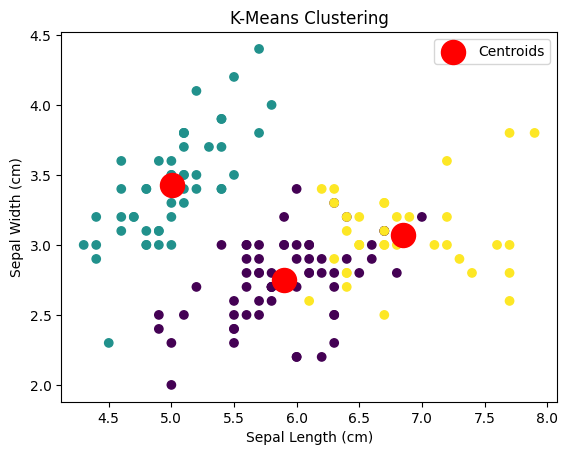

In [13]:
# Visualize


df = pd.DataFrame(X, columns=iris.feature_names)

# Add cluster labels to the DataFrame (optional)
df['Cluster'] = K_means_clusterin.labels_

# Print cluster centers
print("Cluster Centers:")
print(df.groupby('Cluster').mean())

# Visualize the clusters (for 2 features)
plt.scatter(X[:, 0], X[:, 1], c=K_means_clusterin.labels_, cmap='viridis')
plt.scatter(K_means_clusterin.cluster_centers_[:, 0], K_means_clusterin.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [14]:
#silhouette_score
silhouette_score(X, K_means_clusterin.labels_)

0.5528190123564094

- Elbow method for finding the value of k (Inertia)

In [15]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    K_means_clusterin = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    K_means_clusterin.fit(X)
    inertia.append(K_means_clusterin.inertia_)

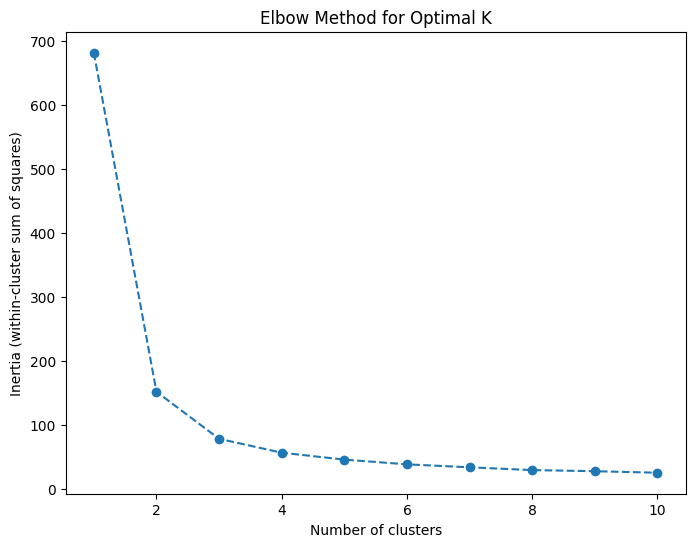

In [16]:
# Plot the Elbow method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

# For k=2:

c:\Users\daf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 5.005660          3.369811           1.560377   
1                 6.301031          2.886598           4.958763   

         petal width (cm)  
Cluster                    
0                0.290566  
1                1.695876  


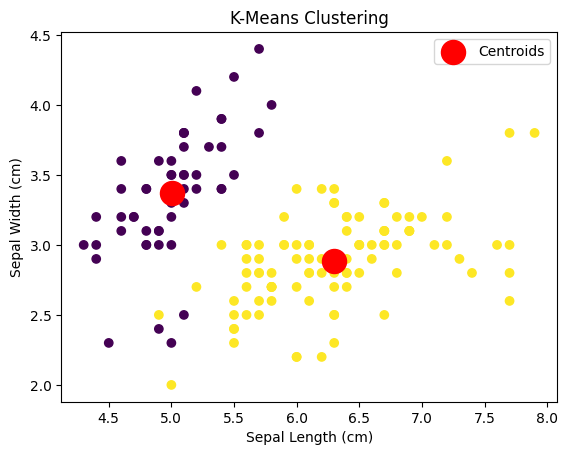

silhouette_score 0.6810461692117462


In [19]:
# model define
K_means_clusterin = KMeans(n_clusters=2, random_state=0)

#model fit
K_means_clusterin.fit(X)

# Visualize


df = pd.DataFrame(X, columns=iris.feature_names)

# Add cluster labels to the DataFrame (optional)
df['Cluster'] = K_means_clusterin.labels_

# Print cluster centers
print("Cluster Centers:")
print(df.groupby('Cluster').mean())

# Visualize the clusters (for 2 features)
plt.scatter(X[:, 0], X[:, 1], c=K_means_clusterin.labels_, cmap='viridis')
plt.scatter(K_means_clusterin.cluster_centers_[:, 0], K_means_clusterin.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

#silhouette_score
print('silhouette_score',silhouette_score(X, K_means_clusterin.labels_))